<a href="https://colab.research.google.com/github/gnarwallman/intro-to-VR/blob/master/finished_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

# Importing some stuff
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import xgboost as xgb
from subprocess import check_output
import pandas as pd
import numpy as np
import random
from itertools import combinations
from sklearn.utils import shuffle
from torch.autograd import Variable
import matplotlib.pyplot as plt
import seaborn as sns

import xgboost as xgb
import lightgbm as lgb

from sklearn.random_projection import GaussianRandomProjection
from sklearn.random_projection import SparseRandomProjection
from sklearn.decomposition import PCA, FastICA
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import NMF
from sklearn.cluster import FeatureAgglomeration

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Ridge

from sklearn.metrics import r2_score
from sklearn.preprocessing import LabelEncoder
import pickle

import warnings
warnings.filterwarnings('ignore')

color = sns.color_palette()
pd.options.display.max_columns = 12
import torch
import torch.nn as nn
import torch.nn.functional as F
import random
import numpy as np
import xgboost as xgb
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
#these are the manipulated variables for the training

#pre processing values
filter_value = 0 #minimum difference for eature to be included
split_Value = .9 # train, validation split

#Define nueral network hyperprameters.
batch_size = 250
num_epochs = 200
learning_rate = 0.07
size_hidden= 100
Momentum = .5 #needed for some optimizers
"Adam" #just to keep track of which optimizer is being used

#XGBoost parameters
xgb_params = {
         'n_trees': 800, 
         'eta': 0.07,
         'max_depth': 5,
         'subsample': 0.7,
         'objective': 'reg:squarederror',
         'eval_metric': 'rmse',
         'base_score': np.mean(y_train),
         }
num_boost_rounds = 2500

lets start with some visualizations

In [3]:
df_train = pd.read_csv("train.csv.zip") #putting csv into dataframe
df_test = pd.read_csv("test.csv.zip")
print("Train shape : ", df_train.shape)
print("Test shape : ", df_test.shape)
df_train.head


Train shape :  (4209, 378)
Test shape :  (4209, 377)


<bound method NDFrame.head of         ID       y  X0 X1  X2 X3  ... X379 X380 X382 X383  X384  X385
0        0  130.81   k  v  at  a  ...    0    0    0    0     0     0
1        6   88.53   k  t  av  e  ...    0    0    0    0     0     0
2        7   76.26  az  w   n  c  ...    0    0    1    0     0     0
3        9   80.62  az  t   n  f  ...    0    0    0    0     0     0
4       13   78.02  az  v   n  f  ...    0    0    0    0     0     0
...    ...     ...  .. ..  .. ..  ...  ...  ...  ...  ...   ...   ...
4204  8405  107.39  ak  s  as  c  ...    0    0    0    0     0     0
4205  8406  108.77   j  o   t  d  ...    0    0    0    0     0     0
4206  8412  109.22  ak  v   r  a  ...    0    0    0    0     0     0
4207  8415   87.48  al  r   e  f  ...    0    0    0    0     0     0
4208  8417  110.85   z  r  ae  c  ...    0    0    0    0     0     0

[4209 rows x 378 columns]>

tottal anonomyzed variables

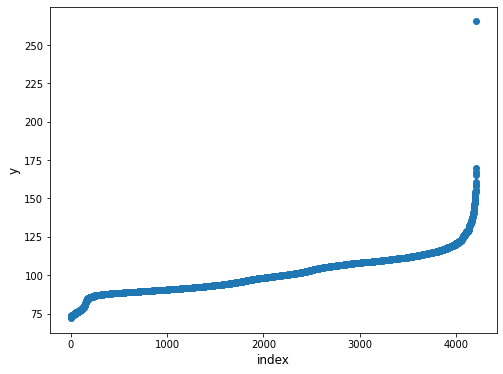

In [4]:
plt.figure(figsize=(8,6))
plt.scatter(range(df_train.shape[0]), np.sort(df_train.y.values))
plt.xlabel('index', fontsize=12)
plt.ylabel('y', fontsize=12)
plt.show()

one outlier that we will likley remove

In [5]:
unique_values_dict = {}
for col in df_train.columns:
   if col not in ["ID", "y", "X0", "X1", "X2", "X3", "X4", "X5", "X6", "X8"]: #this excludes the categorical features
    unique_value = str(np.sort(df_train[col].unique()).tolist()) #sorting unique variables
    tlist = unique_values_dict.get(unique_value,[])
    tlist.append(col)
    unique_values_dict[unique_value] = tlist[:]
for unique_val, columns in unique_values_dict.items():
    print("these columns contain the unique values:",unique_val)
    print(columns)
    print('-----------------------------------------------------------------')

these columns contain the unique values: [0, 1]
['X10', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21', 'X22', 'X23', 'X24', 'X26', 'X27', 'X28', 'X29', 'X30', 'X31', 'X32', 'X33', 'X34', 'X35', 'X36', 'X37', 'X38', 'X39', 'X40', 'X41', 'X42', 'X43', 'X44', 'X45', 'X46', 'X47', 'X48', 'X49', 'X50', 'X51', 'X52', 'X53', 'X54', 'X55', 'X56', 'X57', 'X58', 'X59', 'X60', 'X61', 'X62', 'X63', 'X64', 'X65', 'X66', 'X67', 'X68', 'X69', 'X70', 'X71', 'X73', 'X74', 'X75', 'X76', 'X77', 'X78', 'X79', 'X80', 'X81', 'X82', 'X83', 'X84', 'X85', 'X86', 'X87', 'X88', 'X89', 'X90', 'X91', 'X92', 'X94', 'X95', 'X96', 'X97', 'X98', 'X99', 'X100', 'X101', 'X102', 'X103', 'X104', 'X105', 'X106', 'X108', 'X109', 'X110', 'X111', 'X112', 'X113', 'X114', 'X115', 'X116', 'X117', 'X118', 'X119', 'X120', 'X122', 'X123', 'X124', 'X125', 'X126', 'X127', 'X128', 'X129', 'X130', 'X131', 'X132', 'X133', 'X134', 'X135', 'X136', 'X137', 'X138', 'X139', 'X140', 'X141', 'X142', 'X143', 'X144', 'X145

so we can drop columns with only one unique value

now lets check the mean y value in each of the binary variables


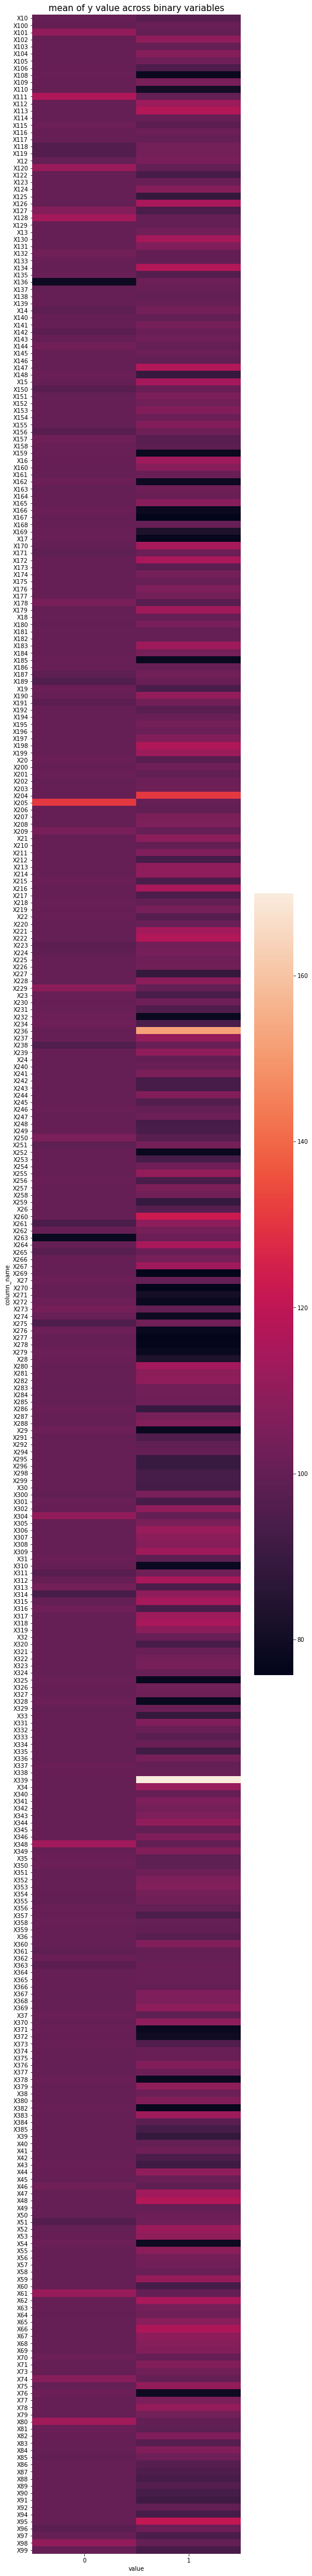

In [6]:
zero_mean = []
one_mean = []
cols_list = unique_values_dict['[0, 1]'] #only values that have both 0 and 1 represented
for col in cols_list: 
  zero_mean.append(df_train.loc[df_train[col]==0].y.mean()) #mean of y values with zero as that feature
  one_mean.append(df_train.loc[df_train[col]==1].y.mean()) #mean of y values with one as that feature

df_new = pd.DataFrame({"column_name":cols_list+cols_list,"value":[0]*len(cols_list)+[1]*len(cols_list),"y_mean":zero_mean+one_mean})
df_new = df_new.pivot('column_name','value','y_mean')
plt.figure(figsize=(8,80))
sns.heatmap(df_new)
plt.title("mean of y value across binary variables",fontsize = 15)
plt.show()

ok so now we are going to add a filter, any feature that does not have a great difference in mean will be removed

In [0]:
df_new.head
df_new['mean_diff'] = abs(df_new.iloc[:,1] -df_new.iloc[:,0]) #differnce in mean values


In [8]:
filtered_df = df_new[(df_new.mean_diff>filter_value)] #removes features whose means are not differnt enough
filtered_df.index
filtered_df.shape #so you can see how many features are left
#not that there is 10 columns that are not filtered, ID, target and the 8 categorical features

(356, 3)

In [0]:
def datagrab(): #this function reads the data and dices it up for use in modeling
  #will read the data set and instanciate a pandas data frame
  train = pd.read_csv("train.csv.zip")
  test = pd.read_csv("test.csv.zip")
  train = train[train.y < 250] #dropps the outlier
  y_train = train['y'] #isolates target column
  train = train.drop('y', 1) #removes target column
  test_id = test['ID'] #grabs test ID for submissions
  #########################
    # which features do we keep?
  features = filtered_df.index #only includes features that passed the filter
  train = train[features]
  test = test[features]
  # Label encoder
  for c in train.columns:
        if train[c].dtype == 'object':
            lbl = LabelEncoder()
            lbl.fit(list(train[c].values) + list(test[c].values))
            train[c] = lbl.transform(list(train[c].values))
            test[c] = lbl.transform(list(test[c].values))
  return train, y_train, test, test_id       

now we have dimensionally reduced the data significantly, lets run the above function

In [10]:
train, y_train, test, test_id = datagrab()
train.shape

(4208, 356)

now we will split the data

In [0]:

from sklearn.model_selection import train_test_split
train_X, val_X, train_y, val_y = train_test_split(train, y_train, 
                                                    train_size=split_Value,
                                                    test_size= (1-split_Value),
                                                    random_state=300,
                                                    )
#scikit learn's split, though validation frames are not used

#
#Calculate some other hyperparameters based on data.  
batch_no = len(train_X) // batch_size  #batches
cols=train_X.shape[1] #Number of columns in input matrix
classes= len(np.unique(train_y))
evice = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
# Assume that we are on a CUDA machine, then this should print a CUDA device:


class Net(nn.Module):
    def __init__(self,cols,size_hidden,classes):
        super(Net, self).__init__()
        #Note that 17 is the number of columns in the input matrix. 
        self.fc1 = nn.Linear(cols, size_hidden)
        #variety of # possible for hidden layer size is arbitrary, but needs to be consistent across layers.  3 is the number of classes in the output (died/survived)
        self.fc2 = nn.Linear(size_hidden, classes)
        
    def forward(self, x):
        x = self.fc1(x)
        x = F.dropout(x, p=0.1)
        x = F.relu(x)
        x = self.fc2(x)
        return F.softmax(x, dim=1)
    
net = Net(cols, size_hidden, classes)
optimizer = torch.optim.Adam(net.parameters(), lr=learning_rate) #swap diffeent optimzers here
criterion = nn.CrossEntropyLoss()


In [12]:
running_loss = 0.0
loss_list =[]
for epoch in range(num_epochs):
    #Shuffle just mixes up the dataset between epocs
    train_X, train_y = shuffle(train_X, train_y)
    # Mini batch learning
    for i in range(batch_no):
        inputs = Variable(torch.FloatTensor(train_X.values))
        labels = Variable(torch.LongTensor(train_y.values))
        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        
    print('Epoch {}'.format(epoch+1), "loss: ",running_loss)
    loss_list.append(running_loss)
    running_loss = 0.0


Epoch 1 loss:  115.86718606948853
Epoch 2 loss:  115.80438137054443
Epoch 3 loss:  115.80438137054443
Epoch 4 loss:  115.80438137054443
Epoch 5 loss:  115.8043885231018
Epoch 6 loss:  115.80438137054443
Epoch 7 loss:  115.80438137054443
Epoch 8 loss:  115.80437421798706
Epoch 9 loss:  115.80438137054443
Epoch 10 loss:  115.8043885231018
Epoch 11 loss:  115.8043885231018
Epoch 12 loss:  115.80438137054443
Epoch 13 loss:  115.8043885231018
Epoch 14 loss:  115.8043885231018
Epoch 15 loss:  115.80438137054443
Epoch 16 loss:  115.80438137054443
Epoch 17 loss:  115.80438137054443
Epoch 18 loss:  115.80438137054443
Epoch 19 loss:  115.8043885231018
Epoch 20 loss:  115.80438137054443
Epoch 21 loss:  115.80438137054443
Epoch 22 loss:  115.80438137054443
Epoch 23 loss:  115.80438137054443
Epoch 24 loss:  115.8043885231018
Epoch 25 loss:  115.80438137054443
Epoch 26 loss:  115.80437421798706
Epoch 27 loss:  115.80437421798706
Epoch 28 loss:  115.80438137054443
Epoch 29 loss:  115.80438137054443
E

KeyboardInterrupt: ignored

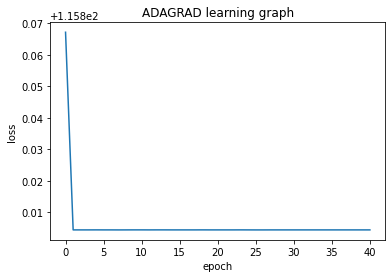

In [13]:
import matplotlib.pyplot as plt
plt.plot(loss_list)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.title("Adam learning graph")
plt.show()

In [29]:
# ================================= xgboost model ============================
 dtrain = xgb.DMatrix(train, y_train)
 model = xgb.train(xgb_params, dtrain, num_boost_round=num_boost_rounds)
 c_score = r2_score(y_train, model.predict(dtrain))
 print(c_score)

0.8206563995182666


In [0]:
testTensor = torch.FloatTensor(test.values)
tensor_prediction = net(Variable(testTensor))
a,b = torch.max(tensor_prediction.data,1)
b = np.asanyarray(b)
id = np.asanyarray(df_test['ID'])
tensor_submission = pd.DataFrame({"ID":id,"y":b})
tensor_submission
tensor_submission.to_csv(' Adam submission.csv',index=False)



In [0]:
predictions = pd.DataFrame(model.predict(xgb.DMatrix(test)))
test_id = pd.DataFrame(test_id)
XGBsubmission = test_id.join(predictions)
XGBsubmission.columns = ["ID","y"]
XGBsubmission.to_csv('XGBoost_submission',index=False)
